In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=False, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [2]:
logis_clf = LogisticRegression()
rndmfor_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
estimators = [('lr', logis_clf), ('rf', rndmfor_clf), ('svm', svm_clf)],
voting = 'hard')


In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 300, noise = 0.25)
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

for train_index, test_index in split.split(np.c_[X, y], y):
    X_train, y_train = X[train_index, :], y[train_index]
    X_test, y_test = X[test_index, :], y[test_index]

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

In [10]:
from sklearn.metrics import accuracy_score

for clf in (logis_clf, rndmfor_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accu = accuracy_score(y_test, pred)
    print(clf.__class__.__name__, accu)


LogisticRegression 0.85
RandomForestClassifier 0.883333333333
SVC 0.916666666667
VotingClassifier 0.916666666667


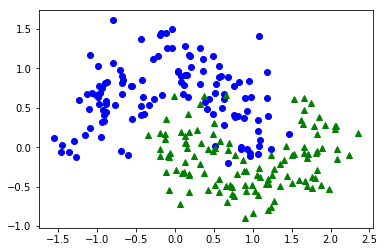

In [13]:
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'bo')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'g^')
plt.show()

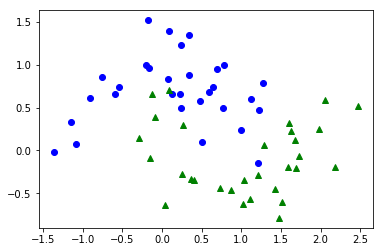

In [14]:
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], 'bo')
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], 'g^')
plt.show()

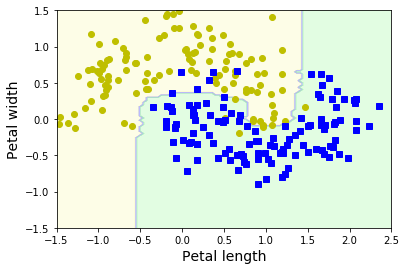

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators = 500,
                            max_samples = 100,
                            bootstrap = True,
                            n_jobs = -1
                           )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

plot_decision_boundary(bag_clf, X_train, y_train, axes = [-1.5, 2.5, -1.5, 1.5])
plt.show()



In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
rdmfor_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rdmfor_clf.fit(iris['data'], iris['target'])

for feat, imp in zip(iris['feature_names'], rdmfor_clf.feature_importances_):
    print(feat, imp)
    

sepal length (cm) 0.0882454487658
sepal width (cm) 0.0221003428922
petal length (cm) 0.435879513797
petal width (cm) 0.453774694545


In [8]:

print([iris['feature_names'], rdmfor_clf.feature_importances_])

[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], array([ 0.08824545,  0.02210034,  0.43587951,  0.45377469])]
